The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('Train.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test=pd.read_csv('Test.csv')

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
## EDA step 1
# Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

E:\Users\Soham Raut\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


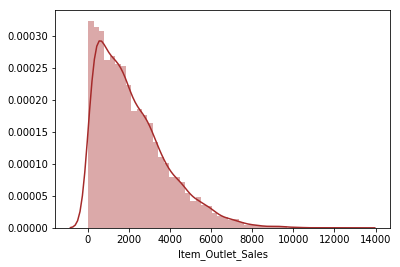

In [10]:
sns.distplot(train.Item_Outlet_Sales,color='brown')

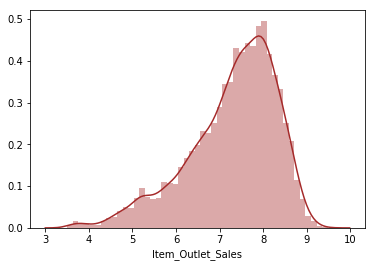

In [11]:
sns.distplot(np.log(train.Item_Outlet_Sales),color='brown')

In [12]:
## Summary STats of Sales

train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [13]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
train[pd.notnull(train.Item_Weight)]['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
19      13.350
20      18.850
22      14.600
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
30      19.250
31      18.600
32      18.700
33      17.850
34      17.500
         ...  
8492     9.300
8493     7.420
8494    15.200
8495     9.695
8496     7.420
8497    13.650
8498    15.350
8499    11.600
8500    20.350
8501     5.340
8502     8.420
8503    20.500
8505    10.500
8506    17.250
8507     5.880
8508    11.350
8509     8.100
8510    13.800
8511    17.500
8512    20.700
8513    12.000
8514    15.000
8515    20.700
8516    18.600
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 7060, dtype: float64

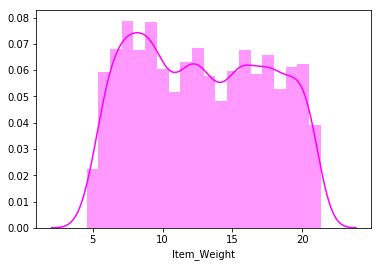

In [15]:
sns.distplot(train[pd.notnull(train.Item_Weight)]['Item_Weight'],color='magenta')
plt.show()

No shape identified in Item Weight. And Item Weight is having missing values.

In [16]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

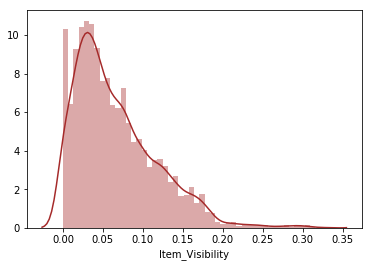

In [17]:
sns.distplot(train.Item_Visibility,color='brown')

In [18]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [19]:
train[train.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944


### Observation : Item Visibility 

Item Visibility has 0s in Dataset which is not correct.

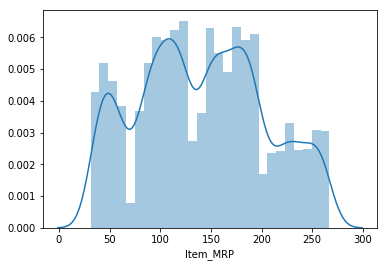

In [20]:
# Item Mrp

sns.distplot(train.Item_MRP)

#### Item MRP shows 4 different distributions which means it needs treating or transformation of values.

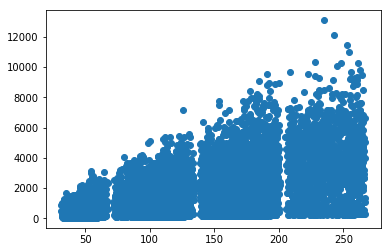

In [21]:
# Item Mrp vs Sales

plt.scatter(train.Item_MRP,train.Item_Outlet_Sales)

In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## univariate categorical variables

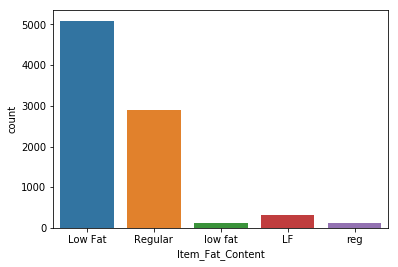

In [23]:
sns.countplot(train.Item_Fat_Content)

In [24]:
train.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
train.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
train.Item_Fat_Content.replace('reg','Regular',inplace=True)

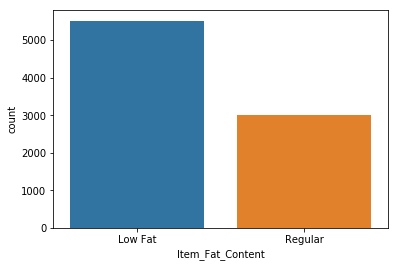

In [25]:
sns.countplot(train.Item_Fat_Content)

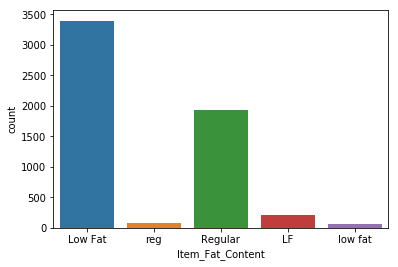

In [26]:
sns.countplot(test.Item_Fat_Content)

In [27]:
test.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
test.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
test.Item_Fat_Content.replace('reg','Regular',inplace=True)

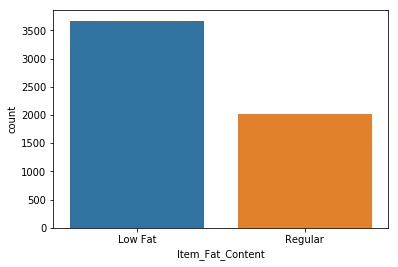

In [28]:
sns.countplot(test.Item_Fat_Content)

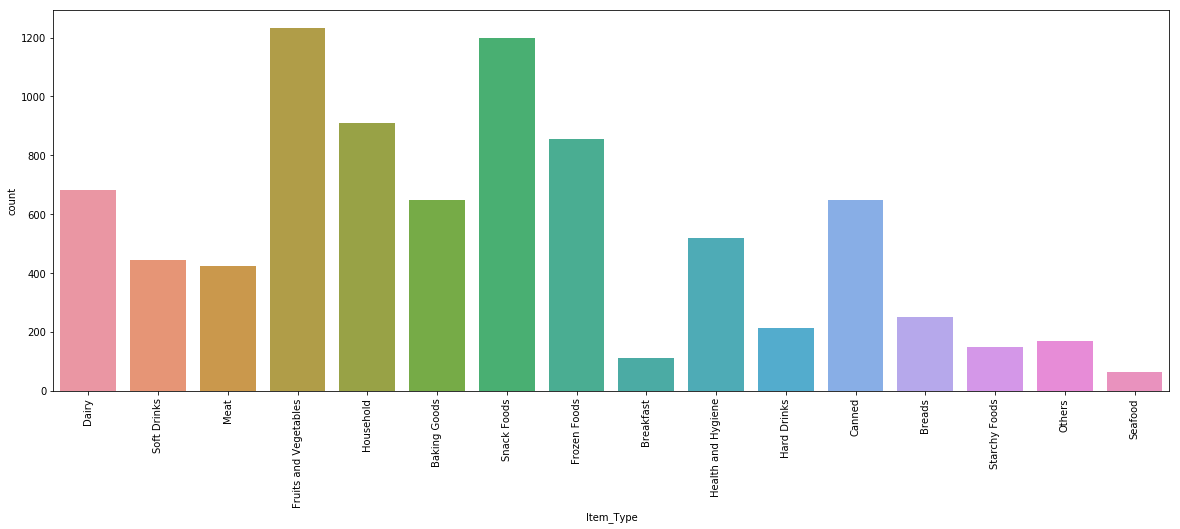

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)
plt.show()

### observation: Item type

1. Fruits and Vegetables
2. Snack Foods
3. Frozen Foods


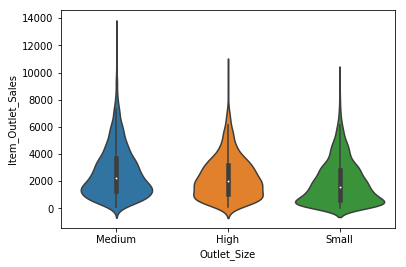

In [30]:
sns.violinplot(train.Outlet_Size,train.Item_Outlet_Sales)

## Bivariate

In [31]:
#Item Visibilty and Sales

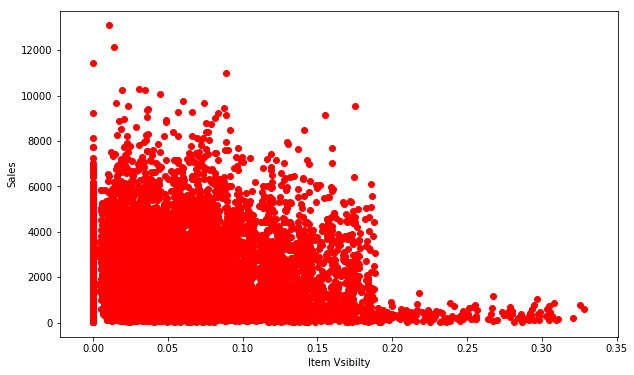

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='red')
plt.xlabel('Item Vsibilty')
plt.ylabel('Sales')
plt.show()

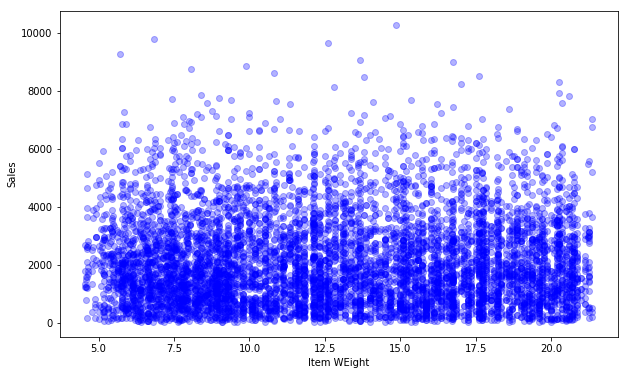

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales,color='blue',alpha=0.3)
plt.xlabel('Item WEight')
plt.ylabel('Sales')
plt.show()

### observation: Item Weight

there is no pattern with Item Sales


In [34]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [35]:
train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCQ06     9
FDO19     9
NCB18     9
FDX31     9
FDV38     9
FDX04     9
NCJ30     9
FDW26     9
FDD38     9
FDP25     9
FDQ40     9
NCF42     9
NCI54     9
FDT07     9
FDG09     9
NCY18     9
FDF56     9
NCL31     9
DRE49     9
FDW49     9
FDV60     9
FDU12     9
DRN47     9
FDF52     9
FDX20     9
NCO54     8
FDR46     8
FDZ26     8
         ..
FDR03     2
FDZ50     2
NCW05     2
NCG19     2
NCC55     2
FDU09     2
FDR57     2
DRI59     2
FDU43     2
NCW30     2
DRC24     2
FDG28     2
FDB10     2
FDD22     2
FDH22     2
FDP15     2
NCX53     2
FDW58     2
FDT33     2
DRE01     2
DRL59     2
FDY43     1
FDE52     1
FDO33     1
FDK57     1
DRF48     1
FDC23     1
FDQ60     1
FDN52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

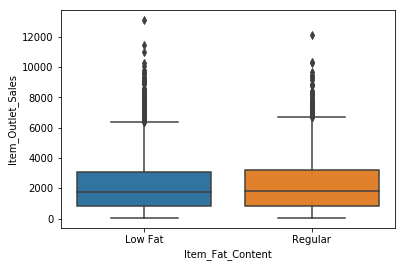

In [36]:
# Item FAt COntent vs Sales

sns.boxplot(train.Item_Fat_Content,train.Item_Outlet_Sales)

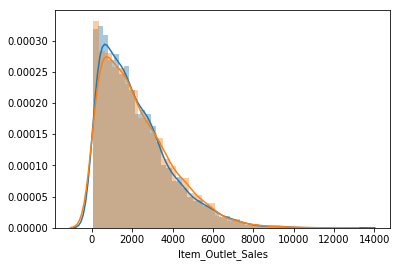

In [37]:

sns.distplot(train[train.Item_Fat_Content=='Low Fat']['Item_Outlet_Sales'])
sns.distplot(train[train.Item_Fat_Content=='Regular']['Item_Outlet_Sales'])

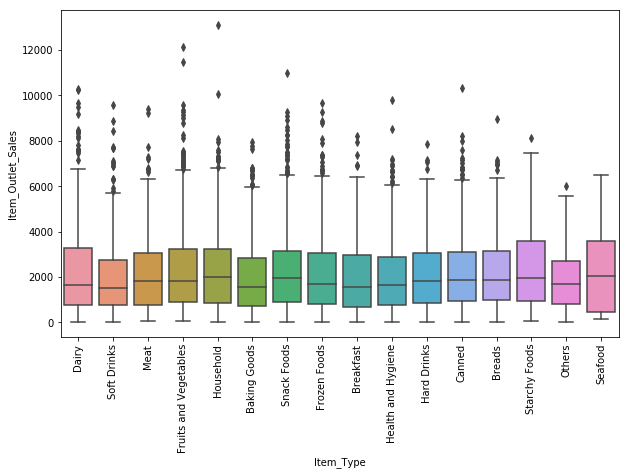

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [39]:
train.groupby('Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [40]:
print(train[train.Item_Outlet_Sales>8000].Item_Type.unique())

['Snack Foods' 'Dairy' 'Fruits and Vegetables' 'Frozen Foods'
 'Starchy Foods' 'Breads' 'Health and Hygiene' 'Soft Drinks' 'Canned'
 'Household' 'Breakfast' 'Meat']


In [41]:
#Identifying Outlet

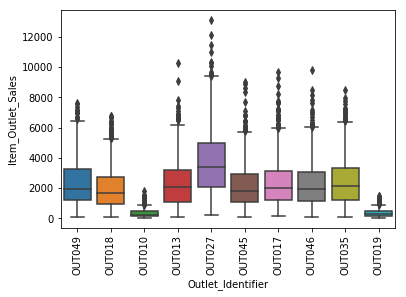

In [42]:
sns.boxplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [43]:
# Outlet 27 max sales Guy on the Street...

train[train.Outlet_Identifier=='OUT027']['Outlet_Size'].unique()

array(['Medium'], dtype=object)

In [44]:
train[train.Outlet_Identifier=='OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,NaN,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,NaN,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


In [45]:
train[train.Outlet_Identifier=='OUT027']['Item_Type'].unique()

array(['Snack Foods', 'Hard Drinks', 'Baking Goods',
       'Fruits and Vegetables', 'Breakfast', 'Household', 'Canned',
       'Health and Hygiene', 'Starchy Foods', 'Soft Drinks',
       'Frozen Foods', 'Dairy', 'Seafood', 'Meat', 'Others', 'Breads'],
      dtype=object)

In [46]:
train[train.Outlet_Identifier=='OUT027']['Outlet_Establishment_Year'].unique()

array([1985], dtype=int64)

## observation

we have observed that outlet belongs to medium size,belong to tier 3 city and is of supermarket type 3 then it will have max sales.

what all items are there in this outlet?

all item types are being sold.

Outlet 27 is 28 years of old


In [47]:
train[train.Outlet_Identifier=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


In [48]:
train[(train.Outlet_Size=='Small')&(train.Outlet_Type=='Grocery Store')]['Item_Outlet_Sales'].describe()

count     528.000000
mean      340.329723
std       249.979449
min        33.955800
25%       153.633350
50%       265.321300
75%       460.733600
max      1482.070800
Name: Item_Outlet_Sales, dtype: float64

### Store Type:-small 

1.   max sale is 1500 and min is 33 and store type is Grocery

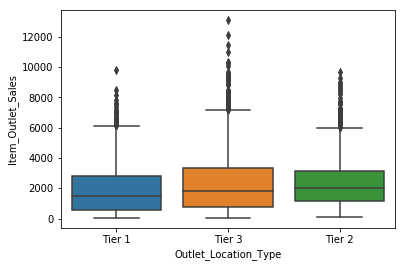

In [49]:
sns.boxplot(train.Outlet_Location_Type,train.Item_Outlet_Sales)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

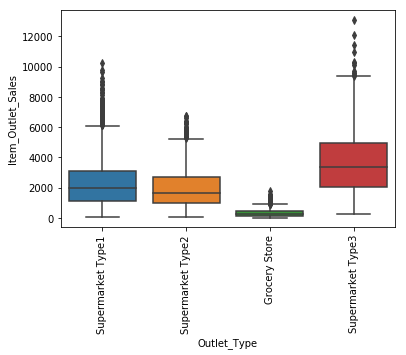

In [50]:
sns.boxplot(train.Outlet_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

In [51]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [53]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [54]:
df=train[pd.isnull(train.Outlet_Size)]

In [55]:
train.Outlet_Size.mode()

0    Medium
dtype: object

In [56]:
train.Outlet_Size.fillna(value='Medium',inplace=True)

In [57]:
test.Outlet_Size.fillna(value='Medium',inplace=True)

In [58]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
train.groupby('Item_Type')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [60]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
train[train.Item_Identifier=='FDX07']['Item_Weight']

3       19.2
1491    19.2
2459    19.2
3089    19.2
5906    19.2
7735     NaN
Name: Item_Weight, dtype: float64

In [63]:
nd=train.groupby('Item_Identifier')['Item_Weight'].mean()

In [64]:
nd[nd.index=='DRA12'][0]

11.6

In [65]:
nd[pd.isna(nd)]

Item_Identifier
FDE52   NaN
FDK57   NaN
FDN52   NaN
FDQ60   NaN
Name: Item_Weight, dtype: float64

In [66]:
train[train.Item_Identifier=='FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [67]:
nd.fillna(nd.mean(),inplace=True)

In [68]:
for i in range(len(train.Item_Weight)):
    if((pd.isna(train.loc[i,'Item_Weight']))):
        train.loc[i,'Item_Weight']=nd[nd.index==train.loc[i,'Item_Identifier']][0]

In [69]:
#train['Item_Weight']=train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

train['Item_Weight']=train.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().mean()))

test['Item_Weight']=test.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().mean()))

In [70]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [71]:
nd1=test.groupby('Item_Identifier')['Item_Weight'].mean()

In [72]:
nd1[nd1.isnull()]

Item_Identifier
DRN47   NaN
FDF04   NaN
FDF05   NaN
FDF22   NaN
FDG09   NaN
FDG50   NaN
FDG57   NaN
FDH58   NaN
FDI45   NaN
FDJ09   NaN
FDL58   NaN
FDO22   NaN
FDP28   NaN
FDT21   NaN
FDY57   NaN
NCJ30   NaN
Name: Item_Weight, dtype: float64

In [73]:
nd1.mean()

12.818091028159797

In [74]:
nd1.fillna(nd1.mean(),inplace=True)

In [75]:
for i in range(len(test.Item_Weight)):
    if((pd.isna(test.loc[i,'Item_Weight']))):
        test.loc[i,'Item_Weight']=nd1[nd1.index==test.loc[i,'Item_Identifier']][0]

In [76]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [79]:
train['Price_per_unit']=train['Item_MRP']/train['Item_Weight']

In [80]:
test['Price_per_unit']=test['Item_MRP']/test['Item_Weight']

In [81]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [82]:
train[train.Item_Weight==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit


In [83]:
test[test.Item_Weight==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_unit


In [84]:
train['Con_Type']=''

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Con_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,


In [86]:
train.loc[0,'Item_Identifier'][:2]

'FD'

In [87]:
for i in range(len(train.Item_MRP)):
    if(train.loc[i,'Item_Identifier'][:2]=='FD'):
        train.loc[i,'Con_Type']='Food'
    elif(train.loc[i,'Item_Identifier'][:2]=='DR'):
        train.loc[i,'Con_Type']='Drinks'
    elif(train.loc[i,'Item_Identifier'][:2]=='NC'):
        train.loc[i,'Con_Type']='Non Consumable'

In [88]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Con_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,Non Consumable


In [89]:
for i in range(len(test.Item_MRP)):
    if(test.loc[i,'Item_Identifier'][:2]=='FD'):
        test.loc[i,'Con_Type']='Food'
    elif(test.loc[i,'Item_Identifier'][:2]=='DR'):
        test.loc[i,'Con_Type']='Drinks'
    elif(test.loc[i,'Item_Identifier'][:2]=='NC'):
        test.loc[i,'Con_Type']='Non Consumable'

In [90]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_unit,Con_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,10.520458,Food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,16.558479,Non Consumable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,21.193985,Food
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,17.222794,Food


In [91]:
#Year of Establishment
train['Existence']=2013-train.Outlet_Establishment_Year
test['Existence']=2013-test.Outlet_Establishment_Year

In [92]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [93]:
train.Item_Visibility.replace(0,0.053931,inplace=True)

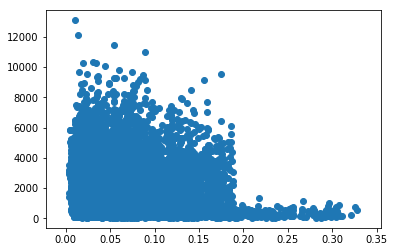

In [94]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales)

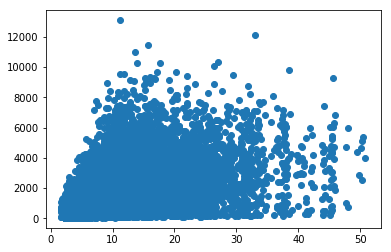

In [95]:
plt.scatter(train.Price_per_unit,train.Item_Outlet_Sales)

In [96]:
test.Item_Visibility.describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [97]:
test.Item_Visibility.replace(0,0.054154,inplace=True)

In [98]:
test.Item_Visibility.describe()

count    5681.000000
mean        0.069049
std         0.048535
min         0.003591
25%         0.033208
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [99]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [100]:
perishable=['Dairy', 'Meat', 'Fruits and Vegetables', 'Frozen Foods','Breakfast','Breads', 'Seafood']

In [101]:
non_perishable=['Soft Drinks','Household', 'Baking Goods', 'Snack Foods','Health and Hygiene', 'Hard Drinks', 'Canned', 'Starchy Foods', 'Others']

In [102]:
# where it matches perishable the list of perishables,'Perishable' else 'No Perishable'

train['Item_Type_Cat']=np.where(train.Item_Type.isin(perishable),'Perishables','Non Perishables')

In [103]:
test['Item_Type_Cat']=np.where(test.Item_Type.isin(perishable),'Perishables','Non Perishables')

In [104]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_unit,Con_Type,Existence,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,Food,14,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,Drinks,4,Non Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,Food,14,Perishables
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,Food,15,Perishables
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,Non Consumable,26,Non Perishables


In [105]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price_per_unit               0
Con_Type                     0
Existence                    0
Item_Type_Cat                0
dtype: int64

In [106]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_per_unit               0
Con_Type                     0
Existence                    0
Item_Type_Cat                0
dtype: int64

In [107]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price_per_unit', 'Con_Type',
       'Existence', 'Item_Type_Cat'],
      dtype='object')

In [108]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Price_per_unit', 'Con_Type', 'Existence',
       'Item_Type_Cat'],
      dtype='object')

In [109]:
print(train.shape)
print(test.shape)

(8523, 16)
(5681, 15)


In [110]:
new_train=train.drop(['Outlet_Establishment_Year','Item_Type','Item_Identifier','Outlet_Identifier'],axis=1)
new_test=test.drop(['Outlet_Establishment_Year','Item_Type','Item_Identifier','Outlet_Identifier'],axis=1)

In [111]:
print(new_train.shape)
print(new_test.shape)

(8523, 12)
(5681, 11)


## One Hot Encoding

In [112]:
dummy_train=pd.get_dummies(new_train)
dummy_test=pd.get_dummies(new_test)

In [113]:
dummy_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_per_unit,Existence,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Con_Type_Drinks,Con_Type_Food,Con_Type_Non Consumable,Item_Type_Cat_Non Perishables,Item_Type_Cat_Perishables
0,9.30,0.016047,249.8092,3735.1380,26.861204,14,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,5.92,0.019278,48.2692,443.4228,8.153581,4,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,8.092457,14,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,19.20,0.053931,182.0950,732.3800,9.484115,15,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
4,8.93,0.053931,53.8614,994.7052,6.031512,26,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [114]:
dummy_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Price_per_unit,Existence,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Con_Type_Drinks,Con_Type_Food,Con_Type_Non Consumable,Item_Type_Cat_Non Perishables,Item_Type_Cat_Perishables
0,20.750,0.007565,107.8622,5.198178,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,8.300,0.038428,87.3198,10.520458,6,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,14.600,0.099575,241.7538,16.558479,15,1,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
3,7.315,0.015388,155.0340,21.193985,6,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,13.600,0.118599,234.2300,17.222794,28,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [115]:
print(dummy_train.shape)
print(dummy_test.shape)

(8523, 23)
(5681, 22)


In [116]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [117]:
train_scaled=pd.DataFrame(sc.fit_transform(dummy_train),columns=dummy_train.columns)
test_scaled=pd.DataFrame(sc.fit_transform(dummy_test),columns=dummy_test.columns)

E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
train_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_per_unit,Existence,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Con_Type_Drinks,Con_Type_Food,Con_Type_Non Consumable,Item_Type_Cat_Non Perishables,Item_Type_Cat_Perishables
0,-0.769772,-1.092518,1.747454,0.910601,1.762172,-0.139541,0.738147,-0.738147,-0.350395,0.798807,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.163795,1.163795
1,-1.497478,-1.026432,-1.489023,-1.018440,-0.568848,-1.334103,-1.354743,1.354743,-0.350395,0.798807,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558,0.859258,-0.859258
2,0.995667,-1.077939,0.010040,-0.049238,-0.576464,-0.139541,0.738147,-0.738147,-0.350395,0.798807,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.163795,1.163795
3,1.361673,-0.317640,0.660050,-0.849103,-0.403060,-0.020085,-1.354743,1.354743,-0.350395,0.798807,...,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.163795,1.163795
4,-0.849432,-0.317640,-1.399220,-0.695373,-0.833263,1.293934,0.738147,-0.738147,2.853918,-1.251866,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,0.859258,-0.859258


In [119]:
test_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Price_per_unit,Existence,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Con_Type_Drinks,Con_Type_Food,Con_Type_Non Consumable,Item_Type_Cat_Non Perishables,Item_Type_Cat_Perishables
0,1.736634,-1.266917,-0.536555,-0.951900,-0.139891,0.740811,-0.740811,-0.350325,0.798824,-0.623969,...,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429,0.849728,-0.849728
1,-0.941390,-0.630969,-0.868937,-0.294488,-1.095512,-1.349873,1.349873,-0.350325,0.798824,-0.623969,...,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429,-1.176848,1.176848
2,0.413754,0.629010,1.629848,0.451333,-0.020438,0.740811,-0.740811,-0.350325,0.798824,-0.623969,...,1.242623,2.620767,-1.375706,-0.349374,-0.351274,-0.316748,-1.593601,2.055799,0.849728,-0.849728
3,-1.153266,-1.105708,0.226697,1.023913,-1.095512,0.740811,-0.740811,-0.350325,0.798824,-0.623969,...,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429,0.849728,-0.849728
4,0.198652,1.021020,1.508110,0.533389,1.532446,-1.349873,1.349873,-0.350325,0.798824,-0.623969,...,1.242623,-0.381568,-1.375706,-0.349374,2.846782,-0.316748,0.627510,-0.486429,-1.176848,1.176848


In [120]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
rf=RandomForestRegressor(n_estimators=51,random_state=10)
Ad=AdaBoostRegressor(base_estimator=rf,n_estimators=51,random_state=10)

In [121]:
rf.fit(train_scaled.drop('Item_Outlet_Sales',axis=1),train_scaled.Item_Outlet_Sales)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [122]:
dt.fit(train_scaled.drop('Item_Outlet_Sales',axis=1),train_scaled.Item_Outlet_Sales)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [123]:
Ad.fit(train_scaled.drop('Item_Outlet_Sales',axis=1),train_scaled.Item_Outlet_Sales)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=51,
         random_state=10)

In [124]:
pred=rf.predict(test_scaled)
pred1=dt.predict(test_scaled)
pred2=Ad.predict(test_scaled)

In [125]:
#Inverse Transformation
sm=StandardScaler()
sales=sm.fit_transform(pd.DataFrame(dummy_train.Item_Outlet_Sales))

In [131]:
sales_pred=sm.inverse_transform(pred2)

In [132]:
sales_pred

array([1649.63046667, 1351.28679216,  926.0283819 , ..., 1711.83707451,
       4312.30827059, 1526.23988497])

In [133]:
fin=pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':sales_pred})

In [134]:
fin.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1649.630467
1,FDW14,OUT017,1351.286792
2,NCN55,OUT010,926.028382
3,FDQ58,OUT017,2338.720412
4,FDY38,OUT027,6328.076518


In [130]:
fin.to_csv('fin.csv',index=False)